#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Any use of **auto-generated code** must be clearly identified, along with the tool or software used to generate it. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 23 2024, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

## What to deliver?

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program, with example runs.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: 
* Include example runs of your code by doing the reports described in the tasks. Simply implementing the code, but never running it will not give many points.
* Include the code that was used to make all reports. Do not include reports of performance and time without also including the code that was used to produce it.
* If you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You have to use Python to solve the assignment. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. The **itertools** module in Python provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
import math
from random import randint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(57)
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}


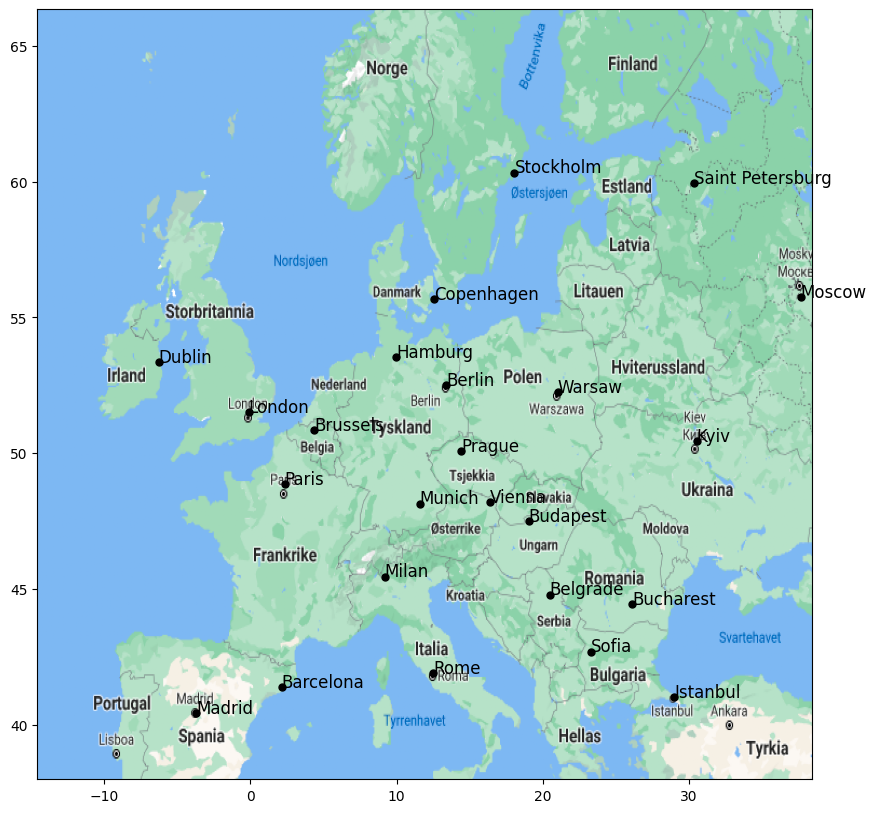

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

# Map (long, lat) to (x, y) for plotting
for city, location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12)


In [3]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()


['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kyiv', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


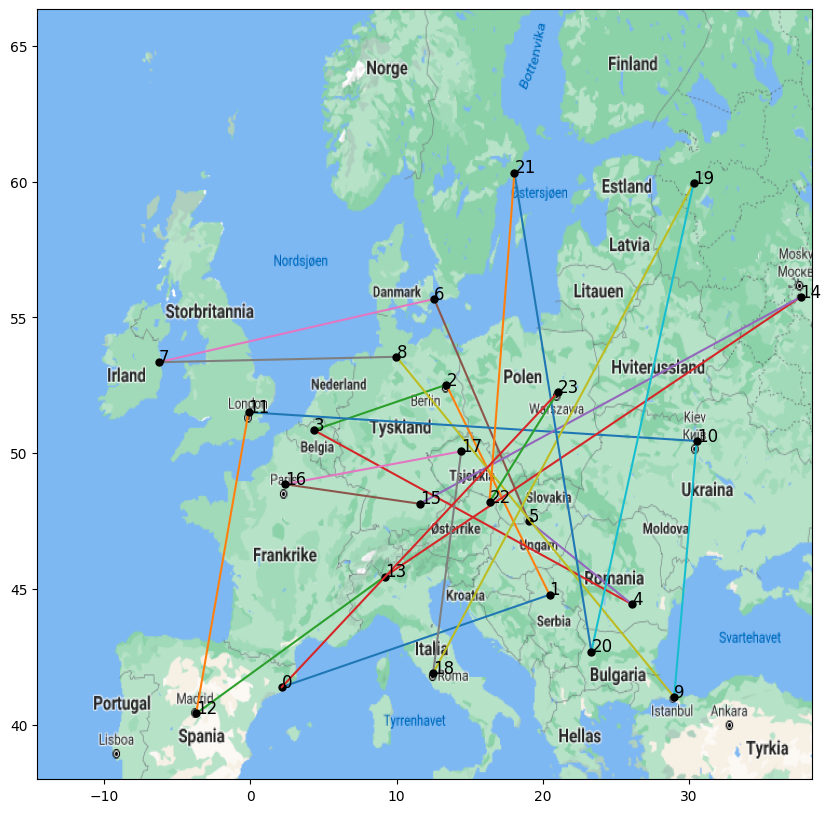

In [4]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.


**Note:** To get distances between cities, use the dictionary `data` created by reading the file `european_cities.csv`. *Do not* calculate distances based on the coordinates. The actual distances do not only depend on the differences in the coordinates, but also of the curvature of the earth. The distances available in `data` are corrected for this, and contain the actual true distances.

In [5]:
import pandas as pd
from itertools import permutations
import time
distances = np.array(data[1:],dtype=float)
def get_permutation(n):
    return permutations(range(n))
#Functions retrieved from helping document for assignment one:
def get_city_names(tour):
    names_list = []
    for city_index in tour:
        city_name = cities[city_index]
        names_list.append(city_name)
    return names_list
def total_distance(tour):
    dist = 0
    for i in range(len(tour)-1):
        #rint(distances[tour[i],tour[i+1]])
        dist += distances[tour[i],tour[i+1]]
    
    dist += distances[tour[0],tour[len(tour)-1]]
    return dist
#total_distance((1,2,5,3,6,8,7,12,4,10,20,22))

# Implement the algorithm here
def exhaustive_search(n):
    #All permutations for n cities
    perms = permutations(range(n))
    smallest = float("inf")
    best_perm=None
    for perm in perms:
        dist = total_distance(perm)
        if dist < smallest:
            smallest =dist
            best_perm=perm
    return best_perm
"""
six =exhaustive_search(6)
ten=exhaustive_search(10)
names_six = get_city_names(six)
names_ten = get_city_names(ten)
plot_plan(names_six)         
"""
#A bit unsure what is asked for here, assuming you by observing how the time increases when adding 
#cities meant something like the following: 
num_cities =[]
rt = []

for i in range(6,11):
    start = time.time()
    exhaustive_search(i)
    end = time.time()
    rt.append(end-start)
    num_cities.append(i)
df = pd.DataFrame({"No. of cities": num_cities, "Running time": rt})
print(df)



   No. of cities  Running time
0              6      0.008036
1              7      0.044534
2              8      0.321762
3              9      3.005920
4             10     29.297143


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [6]:
ten_c = exhaustive_search(10)
names = get_city_names(ten_c)
print("City names:", names)
print("Distance: ",total_distance(ten_c))
"""
Finding these took 14 seconds..
There are 3628800 permutations for 10 cities. Which meeans took 9,3/3628800 =0.00000256283 second.
For all cities, it will take 0,00000256283*number of permutations = 0.00000256283*(24!)
"""

City names: ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin']
Distance:  7486.309999999999


'\nFinding these took 14 seconds..\nThere are 3628800 permutations for 10 cities. Which meeans took 9,3/3628800 =0.00000256283 second.\nFor all cities, it will take 0,00000256283*number of permutations = 0.00000256283*(24!)\n'

In [7]:
print(620448401733239439360000 *0.00000256283)

1.5901037774139978e+18


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

In [8]:
from random import randint
# function that calculate total distance of a permutation.
# Function that makes a small change to a permutation.
def new_perm(p):
    new_p = list(p)
    ri1 = randint(0,len(p)-1)
    ri2 = randint(0,len(p)-1)
    e1 = p[ri1]
    e2 = p[ri2]
    
    for i in range(len(p)):
        if i == ri1:
            new_p[i]=e2
        elif i == ri2:
            new_p[i]= e1
        
    return tuple(new_p)


Results for 10 cities
Length of Best:  9756.39 Worst:  15007.59 Average:  12434.022500000001
Standard deviation:  2677.6325000000015
Running time for ten cities:  0.0020492076873779297 Which is much better that the ES algorithm


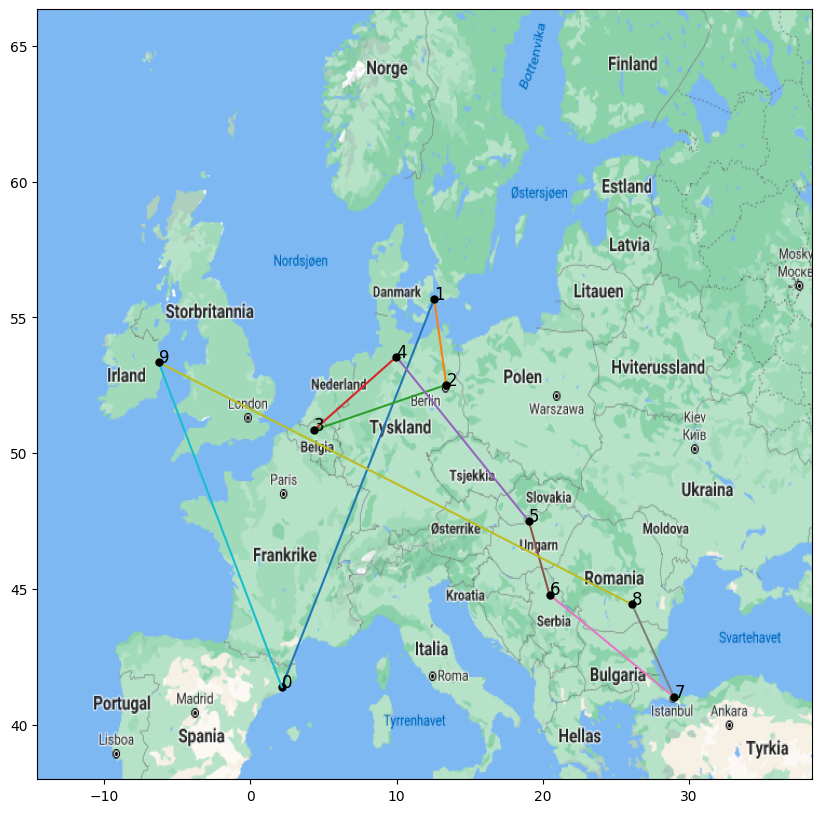



All 24 cities:
Length of Best:  29402.940000000006 
 Worst:  32911.62 
 Average:  30985.808500000003
Standard deviation:  1582.8684999999969
Running time for 24 cities:  0.0020568370819091797 Which is much better that the ES algorithm


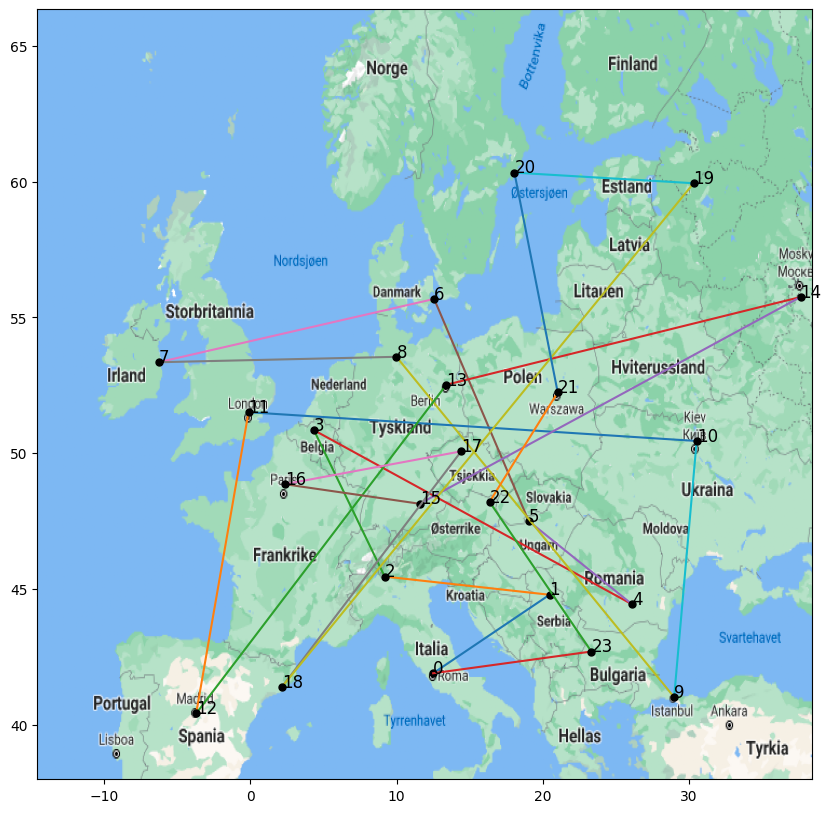

In [9]:
# Implement the algorithm here
def hill_climbing(perm):
    smallest= float("inf")
    optimal =None
    for i in range(3):
        nb = new_perm(perm)
        total_dist = total_distance(nb)
        
        if total_dist < smallest:
            smallest = total_dist
            perm = nb
            optimal=perm
        
    return smallest,optimal
#Assuming you meant running the whole algorithm 20 times and finding the best,worst and mean from all of them
def results(n):
    res ={}
    #All permutations for 10 cities.
    perms = get_permutation(n)
    for i in range(20):
        #Tried making the permutations into a list, but takes up too much memory
        #Therefore they're not that random
        smallest,optimal = hill_climbing(next(perms))
        res[smallest]= optimal
    #Getting best, worst and mean for all 20 runs
    best = min(res.keys())
    worst = max(res.keys())
    avg = np.mean(list(res.keys()))
    return res, best,worst,avg

#Not sure what is meant by running it for ten cities and then running it 20 times
#Assuming you meant running it 20 times, for 10 cities with random starting tours
#And measuring best, worst etc for all of them
print("Results for 10 cities")

start = time.time()
res,best,worst,avg =results(10)
end =time.time()
print("Length of Best: ",best,"Worst: ",worst,"Average: ",avg)
print("Standard deviation: ",avg-best)
print("Running time for ten cities: ",end-start,"Which is much better that the ES algorithm")
plot_plan(get_city_names(res[best]))
#City names for the best tour
print("\n")
print("All 24 cities:")
start = time.time()
res,best,worst,avg =results(24)
end =time.time()
print("Length of Best: ",best,"\n","Worst: ",worst,"\n","Average: ",avg)
print("Standard deviation: ",avg-best)
print("Running time for 24 cities: ",end-start,"Which is much better that the ES algorithm")
plot_plan(get_city_names(res[best]))


#Even though the algorithm is significantly faster, it does not always find the best tour,
#since it does not go through all possible permutations

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. This means that the x-axis should be the generations over time and the y-axis should be the average (over the 20-runs) fitness of the best gene in that generation. Conclude which is best in terms of tour length and number of generations of evolution time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [10]:

def initialisation(n): #Where n is the endiing points
    population = get_permutation(n)
    return population
#Creates n subsets and picks the best solution from each subset, which are to become the parents.    
def selection(pop,pop_size,n):
    best_vals=[]
    for x in range(n):
        i = randint(0,pop_size-3)
        j= randint(i+1,pop_size-1)  
          
        if type(pop)==list:
            subset = pop[i:j]  
        else:
            subset=[next(pop) for y in range(i,j)]
        smallest = float("inf")
        best =None
        for path in subset:
            d = total_distance(path)
            if d<smallest:
                smallest = d
                best = path
        best_vals.append(best)

    return best_vals

def ordered_crossover(p1, p2):
    #print(p1," and ",p2)
    child = [None]*min(len(p1),len(p2))
    start = randint(0, len(p1)-3)
    end = randint(start, len(p1)-1)
    child[start:end]=p1[start:end]
    j=0
    for i in range(len(child)):
        if child[i] is None:
            #if p2[j] not in child:
            child[i]= p2[j]
        j+=1
  #  print("Child: ",child)
    return tuple(child)


In [11]:
# Implement the algorithm here

#Function that initializes a population, select parents, and uses ordered crossover to create new solutions.
# Every other iteration, the "new_perm" function is called, which here is the mutation function.
def new_generation(population,pop_size,num_par,num_c):
    #Selectiong parents from the population
    parents = selection(population,pop_size,num_par)
    children =[]
    for i in range(num_c):
        p1 = randint(0,len(parents)-1)
        p2 = randint(p1,len(parents)-1)
        
        child1 =ordered_crossover(parents[p1],parents[p2])
        child2 = ordered_crossover(parents[p2],parents[p1])
        #Mutation every other iteration
        if i%2==0:
            child1=new_perm(child1) #Mutation to create diversity in the population
        children.append(child1)
        children.append(child2)
    
    return children

def evaluate_gen(vals):
    
    distance_dict = {total_distance(v): v for v in vals}
    best = min(distance_dict)
    worst = max(distance_dict)
    avg = sum(distance_dict.keys()) / len(distance_dict)
    std_div = avg-best
    return distance_dict[best], distance_dict[worst], avg,std_div


#Putting it all together
#This function creates n new generation, and finds the results for best,worst and mean
def genetic_algorithm(pop_size,n,np,num_c):
    results = []
    #Initializing the population
    population = initialisation(pop_size)
    for i in range(n):
        #Creating new generation, returns the children of the original population
        new = new_generation(population,pop_size,np,num_c)
        #Best,worst, standard div and mean of the new gen. 
        b,w,a,std = evaluate_gen(new)
        #Sets the new population to be the new generation
        population = new
        results.append([b,w,a,std])
    return results


Generation  0
Best: 
 Tour:  ['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Istanbul', 'Copenhagen', 'Hamburg', 'Dublin'] 
 Distance: 11501.010000000002
worst: 
 Tour:  ['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Hamburg', 'Copenhagen', 'Dublin', 'Istanbul'] 
 Distance: 13223.260000000002
Average tour length:  12534.590000000002
Standard diviation:  1033.58


Generation  1
Best: 
 Tour:  ['Barcelona', 'Brussels', 'Berlin', 'Belgrade', 'Bucharest', 'Budapest', 'Istanbul', 'Copenhagen', 'Hamburg', 'Dublin'] 
 Distance: 9713.420000000002
worst: 
 Tour:  ['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Copenhagen', 'Dublin', 'Hamburg', 'Budapest', 'Istanbul'] 
 Distance: 13055.070000000002
Average tour length:  11688.46125
Standard diviation:  1975.0412499999984


Generation  2
Best: 
 Tour:  ['Barcelona', 'Brussels', 'Berlin', 'Belgrade', 'Bucharest', 'Budapest', 'Istanbul', 'Hamburg', 'Hamburg', 'Dublin'] 
 Distance: 9

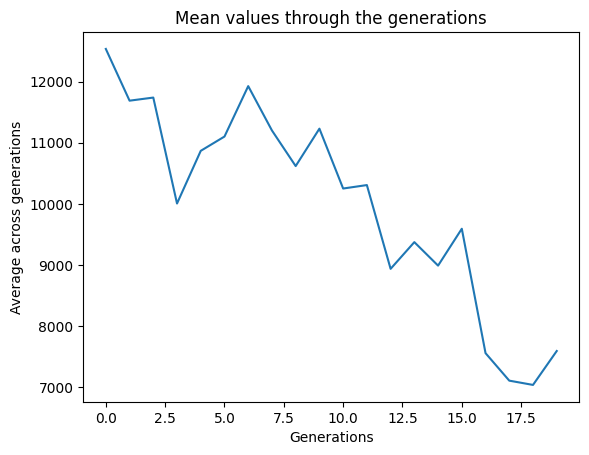

In [12]:
# The best tours from each generation:
# Best,worst and mean for ten runs, with population size 10, 6 pparents and 3 iterations
#which will create 6 children.
# Ajusting parameters so that one can try the algorithm on a larger population:
#pop_20 = genetic_algorithm(20,10,8,6)
pop10 = genetic_algorithm(10,20,10,6)
def print_results(results):
    for i in range(len(pop10)):
        print("Generation ",i)
        print("Best:","\n","Tour: ",get_city_names(results[i][0]),"\n","Distance:",total_distance(results[i][0]))
        print("worst:","\n","Tour: ",get_city_names(results[i][1]),"\n","Distance:",total_distance(results[i][1]))
        print("Average tour length: ",results[i][2])
        print("Standard diviation: ",results[i][3])
        print("\n")


def find_shortest(results):
    best_tours =[results[i][0] for i in range(len(results))]
    distance = [total_distance(x) for x in best_tours]
    max_i = distance.index(max(distance))
    return best_tours[max_i],distance[max_i]

# finding average for each generation
def find_mean(results):
    x=[]
    y =  []
    for i in range(len(results)):
        x.append(i)
        y.append(results[i][2])
    return x,y
print_results(pop10)
x,y = find_mean(pop10)
print("Mean: ",x,y)
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Average across generations')
plt.title('Mean values through the generations')
plt.show()

    
    


Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [13]:
# Answer

#Running the algorithm with three different population sizes.
# assuming 6 and 10 cities are included as to of the three

pop_6 = genetic_algorithm(6,20,6,3)
pop_10 = genetic_algorithm(10,20,6,4)
pop_15=genetic_algorithm(15,20,8,4)
shortest10 =find_shortest(pop10)
shortest_6=find_shortest(pop_6)
shortest_15=find_shortest(pop_15)


#Printing the results
print_results(pop10)
print_results(pop_15)
print_results(pop_6)
#Time for 24 cities:
#start = time.time()
#all = genetic_algorithm(24,3,14,8)
#print("Time 24 cities: ",time.time()-start)
"""
The algorithm found the shortest tour:
((6, 8, 3, 7, 0, 1, 9, 4, 5, 2), 7486.309999999999) 
This took 14 seconds, however, i ran the algorithm 20 times/generations, while
the exchaustive search iterated over each permutation.


While the exhaustive search algorithm inspeected all permutations of n cities, the genetic algorithm
inspected:
for each generation n the algorithm creates a new population of num_children*2 new tours.
num_parents of these are selected to be the parents of the new generation.
The algorithm hence inspects n*(num_c*2) different options which is significantly more than the ES algorithm. 
"""
#Visualisation of best tour for three different population sizes
plot_plan(get_city_names(shortest_6[0]))

TypeError: object of type 'NoneType' has no len()

Due to my computer being really slow I've had to comment out some parts when testing. Running the genetic algorithm is too much for this PC. I let it go on for 1 hour and 20mins before interrupting it. 

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [ ]:
# Implement algorithm here